In [4]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [176]:
settings_0flux = [
    "?name=0flux?J_pm=-0.046?B=[0.000,0.000,0.000].jld",
    "?name=0flux?J_pm=-0.046?B=[0.000,0.042,0.042].jld",
    "?name=0flux?J_pm=-0.046?B=[0.035,0.035,0.035].jld"
]

settings_piflux = [
    "?name=piflux?J_pm=0.333?B=[0.000,0.000,0.000].jld",
    "?name=piflux?J_pm=0.333?B=[0.000,0.042,0.042].jld",
    "?name=piflux?J_pm=0.333?B=[0.035,0.035,0.035].jld"
]



In [6]:

f = h5py.File(files_0flux[0])
    

Text(0.5, 1.0, '111 field, $|B|$=0.06')

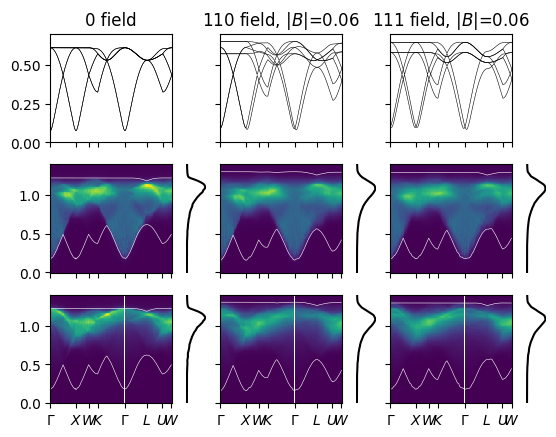

In [170]:
fig, Ax = plt.subplots(nrows=3, ncols=6,sharex=False, sharey=False,width_ratios=[3,0.5,3,0.5,3,0.5])

# autorange sweep
spinon_max_E=-float("inf")
intens_max_E=-float("inf")
intens_max_Spm=-float("inf")
intens_max_Smagnetic=-float("inf")

for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings_0flux[i])
    fsp = h5py.File("output/spinons"+settings_0flux[i])
    spinon_max_E = max(spinon_max_E, np.max(fsp["spinon_dispersion"]["bands"]))
    intens_max_E = max(intens_max_E, np.max(intensity_file["intensity"]["W"]))
    intens_max_Spm = max(intens_max_Spm, np.max(intensity_file["intensity"]["Spm"]["re_"]) )
    intens_max_Smagnetic = max(intens_max_Smagnetic, np.max(np.ma.masked_invalid(intensity_file["intensity"]["Smagnetic"])))


for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings_0flux[i])

    intens=intensity_file["intensity"]
    Ax[1][2*i].pcolormesh(intens["tau"], intens["W"], intens["Spm"]['re_'], shading='nearest', vmax=intens_max_Spm)
    Ax[2][2*i].pcolormesh(intens["tau"], intens["W"], intens["Smagnetic"],shading='nearest', vmax=intens_max_Smagnetic)

    for a in (Ax[1][2*i], Ax[2][2*i]):
        a.plot(np.array(intens["tau"]), intens["bounds"][0], color='w',lw=0.4)
        a.plot(np.array(intens["tau"]), intens["bounds"][1], color='w',lw=0.4)


    Ax[1][2*i].set_xticks(intens["ticks_tau"], labels=[])
    Ax[2][2*i].set_xticks(intens["ticks_tau"], labels=["$%s$"%(x.decode("UTF8")) for x in intens["ticks_label"]])
              

    fsp = h5py.File("output/spinons"+settings_0flux[i])
    spinon_intens = fsp["spinon_dispersion"]
    Ax[0][2*i].plot(np.array(spinon_intens["tau"]), np.array(spinon_intens["bands"]).T, color='k', lw=0.4)
    Ax[0][2*i].set_ylim([0,spinon_max_E+0.05])
    Ax[0][2*i].set_xticks(spinon_intens["ticks_tau"], labels=[])
    Ax[0][2*i].set_xlim( [np.min(spinon_intens["ticks_tau"]), np.max(spinon_intens["ticks_tau"])])

    fint = h5py.File("output/integrated"+settings_0flux[i])
    W = np.array(fint['intensity']['W'])
    Ax[1][2*i+1].plot(fint['intensity']['Spm']['re_'], W,color='k')
    Ax[2][2*i+1].plot(np.array(fint['intensity']['Smagnetic']), W,color='k')
    
    Ax[1][2*i+1].set_ylim([min(W),max(W)])
    Ax[2][2*i+1].set_ylim([min(W),max(W)])
    Ax[1][2*i+1].axis('off')
    Ax[2][2*i+1].axis('off')

    for j in range(3):
        Ax[j][2*i+1].set_yticklabels([])
        if i != 0:
            Ax[j][2*i].set_yticklabels([])
            
    
    Ax[0][2*i+1].axis('off')
    for j in [1,2]:
        a = Ax[j][2*i+1]
        a.set_xticks([])
        a.set_yticks([])
        # a.set_xlim([0,489384])

Ax[0][0].set_title("0 field")
Ax[0][2].set_title("110 field, $|B|$=0.06")
Ax[0][4].set_title("111 field, $|B|$=0.06")


0.05939696961967

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'output/spinons?name=piflux?J_pm=0.333?B=[0.035,0.035,0.000].jld', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

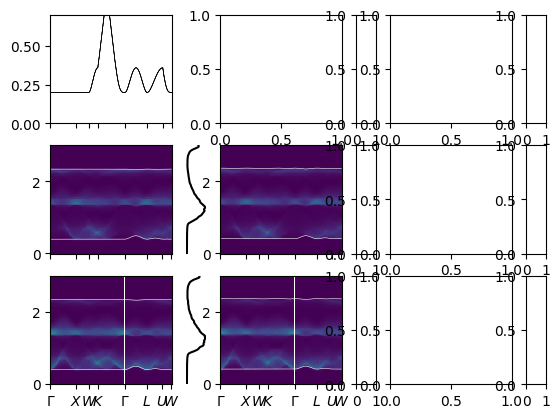

In [175]:
fig, Ax = plt.subplots(nrows=3, ncols=6,sharex=False, sharey=False,width_ratios=[3,0.5,3,0.5,3,0.5])

# autorange sweep
spinon_max_E=-float("inf")
intens_max_E=-float("inf")
intens_max_Spm=-float("inf")
intens_max_Smagnetic=-float("inf")

for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings_0flux[i])
    fsp = h5py.File("output/spinons"+settings_0flux[i])
    spinon_max_E = max(spinon_max_E, np.max(fsp["spinon_dispersion"]["bands"]))
    intens_max_E = max(intens_max_E, np.max(intensity_file["intensity"]["W"]))
    intens_max_Spm = max(intens_max_Spm, np.max(intensity_file["intensity"]["Spm"]["re_"]) )
    intens_max_Smagnetic = max(intens_max_Smagnetic, np.max(np.ma.masked_invalid(intensity_file["intensity"]["Smagnetic"])))


settings= settings_piflux

for i in range(3):
    intensity_file = h5py.File("output/SQW"+settings[i])

    intens=intensity_file["intensity"]
    Ax[1][2*i].pcolormesh(intens["tau"], intens["W"], intens["Spm"]['re_'], shading='nearest', vmax=intens_max_Spm)
    Ax[2][2*i].pcolormesh(intens["tau"], intens["W"], intens["Smagnetic"],shading='nearest', vmax=intens_max_Smagnetic)

    for a in (Ax[1][2*i], Ax[2][2*i]):
        a.plot(np.array(intens["tau"]), intens["bounds"][0], color='w',lw=0.4)
        a.plot(np.array(intens["tau"]), intens["bounds"][1], color='w',lw=0.4)


    Ax[1][2*i].set_xticks(intens["ticks_tau"], labels=[])
    Ax[2][2*i].set_xticks(intens["ticks_tau"], labels=["$%s$"%(x.decode("UTF8")) for x in intens["ticks_label"]])
              

    fsp = h5py.File("output/spinons"+settings[i])
    spinon_intens = fsp["spinon_dispersion"]
    Ax[0][2*i].plot(np.array(spinon_intens["tau"]), np.array(spinon_intens["bands"]).T, color='k', lw=0.4)
    Ax[0][2*i].set_ylim([0,spinon_max_E+0.05])
    Ax[0][2*i].set_xticks(spinon_intens["ticks_tau"], labels=[])
    Ax[0][2*i].set_xlim( [np.min(spinon_intens["ticks_tau"]), np.max(spinon_intens["ticks_tau"])])

    fint = h5py.File("output/integrated"+settings[i])
    W = np.array(fint['intensity']['W'])
    Ax[1][2*i+1].plot(fint['intensity']['Spm']['re_'], W,color='k')
    Ax[2][2*i+1].plot(np.array(fint['intensity']['Smagnetic']), W,color='k')
    
    Ax[1][2*i+1].set_ylim([min(W),max(W)])
    Ax[2][2*i+1].set_ylim([min(W),max(W)])
    Ax[1][2*i+1].axis('off')
    Ax[2][2*i+1].axis('off')

    for j in range(3):
        Ax[j][2*i+1].set_yticklabels([])
        if i != 0:
            Ax[j][2*i].set_yticklabels([])
            
    
    Ax[0][2*i+1].axis('off')
    for j in [1,2]:
        a = Ax[j][2*i+1]
        a.set_xticks([])
        a.set_yticks([])
        # a.set_xlim([0,489384])

Ax[0][0].set_title("0 field")
Ax[0][2].set_title("110 field, $|B|$=0.06")
Ax[0][4].set_title("111 field, $|B|$=0.06")